# Support Vector Machines

We’ve attached a dataset, $\texttt{MNISTdata.mat}$, containing a sample of the famout MNISTbenchmark (http://yann.lecun.com/exdb/mnist).   Your  report  must  provide  summaries  of  each  method’s  performance  andsome  additional  details  of  your  implementation.   Compare  the  relative  strengths  andweaknesses of the methods based on both the experimental results and your understandingof the algorithms. 

You can load the data with $\texttt{scipy.io.loadmat}$, which will return a Python dictionarycontaining the test and train data and labels.

The purpose of this assignment is for you to implement the SVM. You are not allowed toimport an SVM from, for instance, $\texttt{scikit-learn}$.  You may, however, use a library (suchas $\texttt{scipy.optimize.minimize}$ or $\texttt{cvxopt.solvers.qp}$) for the optimization process.

Please refer to the instructions in the PDF document coming with the writen problems. 

In [1]:
!wget https://peilundai.com/ps4_programming/MNIST_data.mat

--2021-07-02 08:37:01--  https://peilundai.com/ps4_programming/MNIST_data.mat
Resolving peilundai.com (peilundai.com)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to peilundai.com (peilundai.com)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6464557 (6.2M) [application/octet-stream]
Saving to: ‘MNIST_data.mat.4’

MNIST_data.mat.4    100%[===================>]   6.17M  34.4MB/s    in 0.2s    

2021-07-02 08:37:02 (34.4 MB/s) - ‘MNIST_data.mat.4’ saved [6464557/6464557]



### (a) SVM for binary classifications

Develop code for training an SVM for binary classification with nonlinear kernels

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import math, time  
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from tqdm.notebook import tqdm

start = time.time() 

data = sio.loadmat('MNIST_data.mat')



header = data['__header__']

X_train = data['train_samples']
y_train = data['train_samples_labels']
X_test = data['test_samples']
y_test = data['test_samples_labels']

print(header)

b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Mar 09 15:56:47 2007'


In [3]:
print("Train Samples: ")
print(X_train.shape)
print("train Labels: ")
print(y_train.shape)
print()
print("Test Samples: ")
print(X_test.shape)
print("Test Labels: ")
print(y_test.shape)

Train Samples: 
(4000, 784)
train Labels: 
(4000, 1)

Test Samples: 
(1000, 784)
Test Labels: 
(1000, 1)


first image: 9


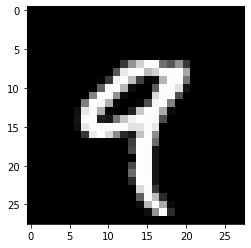

In [4]:
img = X_train[0].reshape(28,28)
# And displaying the image
plt.imshow(img, cmap="gray")
print("first image: " + str(y_train[0][0]))

In [5]:
steps = [('Scaler', StandardScaler()), ('SVM', svm.SVC(kernel='poly'))]
pipeline = Pipeline(steps)

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10, 1, 0.1, 0.01]}

grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [6]:
tqdm(grid.fit(X_train, y_train.ravel()))
print("score = %3.2f" %(grid.score(X_test, y_test)))
print("best parameters from train data: ", grid.best_params_)

score = 0.93
best parameters from train data:  {'SVM__C': 0.1, 'SVM__gamma': 0.01}


### (b) Predict for new data

Develop code for predict the $\{-1, +1\}$ for new data. To use the predictive model (7.13) you need to determine $b$, which can be done with (7.37).

In [7]:
y_pred = grid.predict(X_test)

### (c) Multiclass classification

Useing your implementation, compare multiclass classification performance of two different voting schemes: 
 i. one versus rest;
 ii. one versus one

### (d) Hyperparameter

The parameter $C >0$ controls the tradeoff between the size of the margin and theslack variable penalty.  It is analogous to the inverse of a regularization coefficient.Include in your report a brief discussion of how you found an appropriate value.

## The Gridsearch method applies a method to test the fit of the parameters based on an input from a list of C values, [0.001, 0.1, 100, 10e5], as well as gamma values, and it has determined that for C=0.1, the model fits best, providing 93% accuracy

### (e) Confusion matrix

In addition to calculating percent accuracy, generate multiclass confusion matrices (https://en.wikipedia.org/wiki/Confusionmatrix) as part of your analysis.

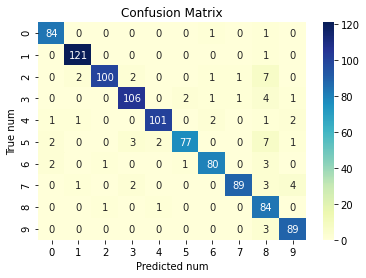

In [11]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred),
          annot=True,fmt="d",
          cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted num')
plt.ylabel('True num');